In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
train = pd.read_csv('titanic_train.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

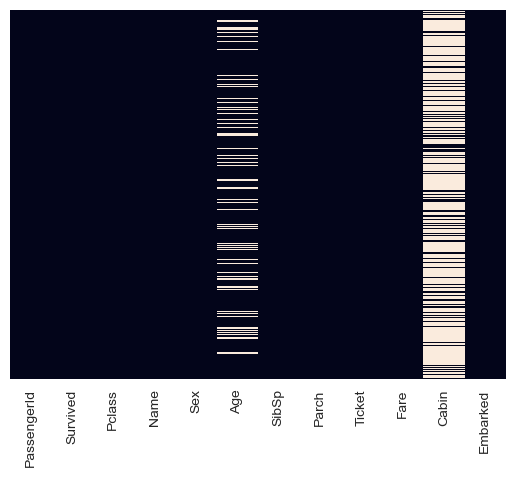

In [16]:
sns.heatmap(train.isnull(), yticklabels=False,cbar= False)

In [15]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

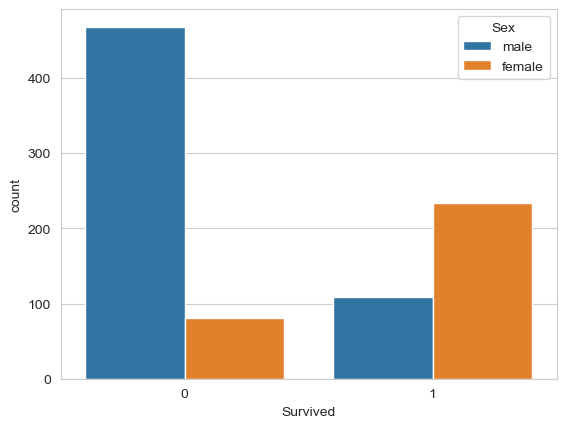

In [18]:
sns.countplot(x='Survived', hue= 'Sex',data= train)

<Axes: xlabel='Survived', ylabel='count'>

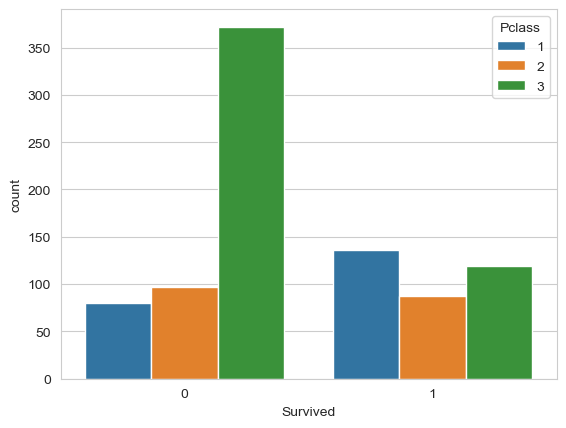

In [19]:
sns.countplot(x='Survived', hue ='Pclass' ,data= train)

C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_2428\3584852306.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde= False)


<Axes: xlabel='Age'>

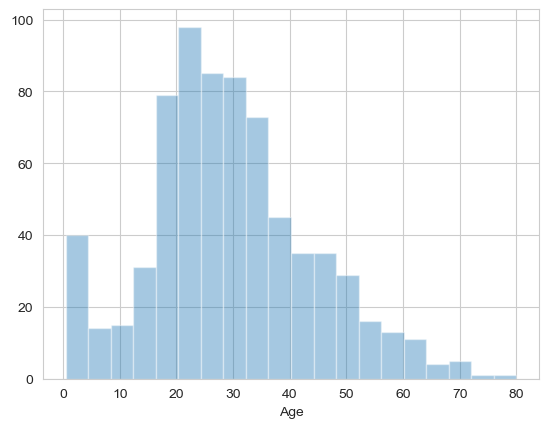

In [21]:
sns.distplot(train['Age'].dropna(), kde= False)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

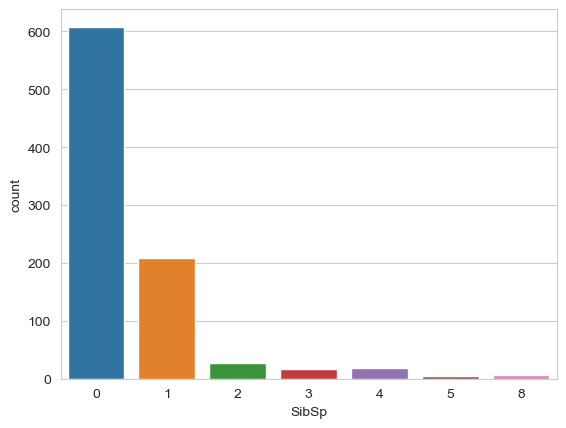

In [23]:
sns.countplot(x='SibSp', data= train)

C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_2428\1735696010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'].dropna(), kde= False)


<Axes: xlabel='Fare'>

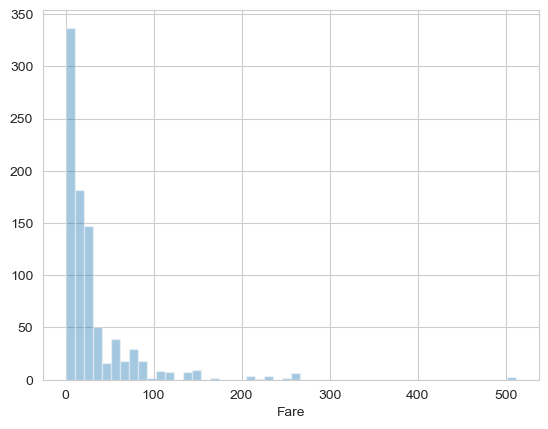

In [27]:
sns.distplot(train['Fare'].dropna(), kde= False)

In [28]:
import cufflinks as cf
cf.go_offline()

In [29]:
train['Fare'].iplot(kind='hist', bins= 50)

<Axes: xlabel='Pclass', ylabel='Age'>

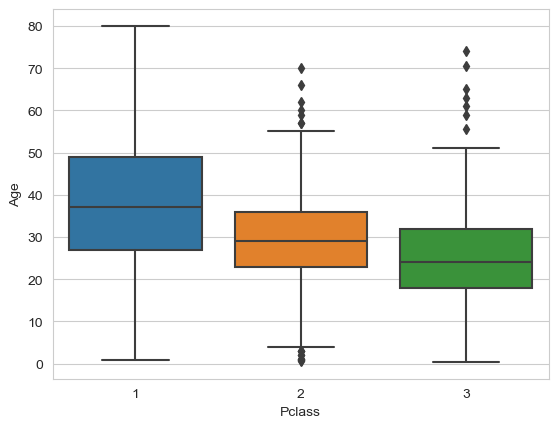

In [30]:
sns.boxplot(x='Pclass', y ='Age', data= train)

In [33]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1 :
            return 37
        elif Pclass ==2:
            return 29
        else :
            return 24
    else:
        return Age
    

In [34]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [35]:
train.drop('Cabin', axis=1, inplace =True)

In [36]:
train.dropna(inplace = True)

<Axes: >

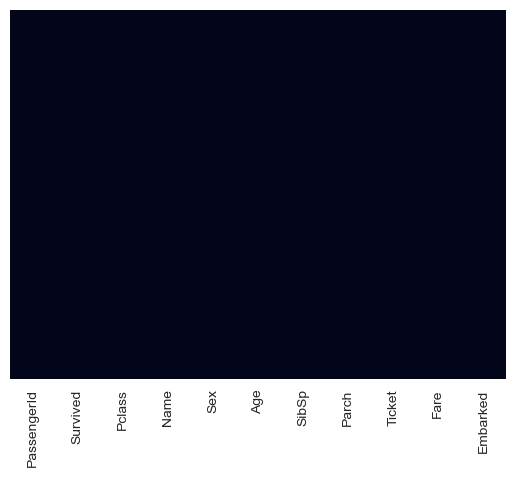

In [39]:
sns.heatmap(train.isnull(), cbar= False,yticklabels= False)

In [44]:
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [42]:
embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [45]:
train = pd.concat([train,sex,embark], axis = 1)

In [47]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [48]:
train.drop(['Sex','Name','Embarked','Ticket'], axis = 1, inplace =True)

In [52]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [51]:
train.drop('PassengerId', axis= 1, inplace =True)

In [53]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [54]:
from sklearn.model_selection import train_test_split_split 

In [55]:
x= train.drop('Survived', axis = 1)
y= train['Survived'] 

In [56]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= .3, random_state= 101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(x_train,y_train)

C:\Users\francis mawutor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [61]:
prediction = lr.predict(x_test)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print (classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

[[147  16]
 [ 30  74]]
